In [115]:
!pip install dexplot
import numpy as np 
import pandas as pd
import dexplot as dxp


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
!pip install dexplot


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 173.4/173.4 kB 183.3 kB/s eta 0:00:00


In [75]:
import warnings
warnings.filterwarnings('ignore')

#display max columns of pandas dataframe
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
battle = pd.read_csv("battles.csv")

In [3]:
battle.head(6)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN


In [4]:
battle.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


In [5]:
battle.size

950

In [6]:
battle.shape

(38, 25)

In [7]:
battle.rename(columns={'attacker_1':'primary_attacker'},inplace=True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [8]:
battle.rename(columns={'defender_1':'primary_defender'},inplace=True)
battle.head()

,name,year,battle_number,attacker_king,defender_king,primary_attacker,attacker_2,attacker_3,attacker_4,primary_defender,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [52]:
battle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   primary_attacker    38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   primary_defender    37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [9]:
battle['attacker_king'].value_counts()

Joffrey/Tommen Baratheon    14
Robb Stark                  10
Balon/Euron Greyjoy          7
Stannis Baratheon            5
Name: attacker_king, dtype: int64

In [10]:
battle['location'].value_counts()

Riverrun                                3
Winterfell                              3
Storm's End                             2
Harrenhal                               2
Darry                                   2
Moat Cailin                             2
Deepwood Motte                          2
Torrhen's Square                        2
Golden Tooth                            1
Seagard                                 1
Castle Black                            1
Shield Islands                          1
Saltpans                                1
Ruby Ford                               1
Ryamsport, Vinetown, Starfish Harbor    1
Dragonstone                             1
The Twins                               1
Red Fork                                1
Duskendale                              1
King's Landing                          1
Crag                                    1
Mummer's Ford                           1
Oxcross                                 1
Stony Shore                       

In [11]:
battle['defender_king'].value_counts()

Robb Stark                  14
Joffrey/Tommen Baratheon    13
Balon/Euron Greyjoy          4
Stannis Baratheon            2
Renly Baratheon              1
Mance Rayder                 1
Name: defender_king, dtype: int64

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

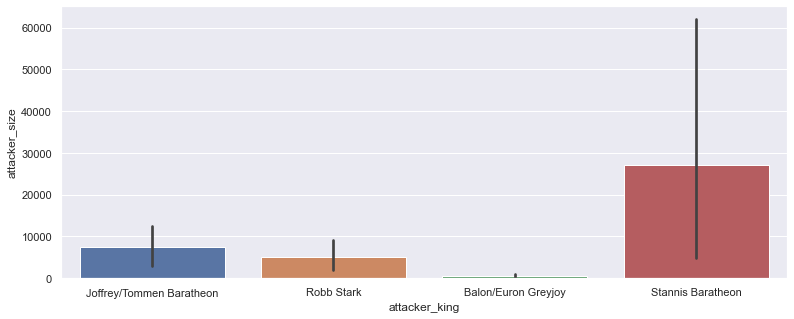

In [45]:
sns.set(rc={'figure.figsize': (13, 5)})
sns.barplot(x='attacker_king', y='attacker_size', data = battle)
plt.show()

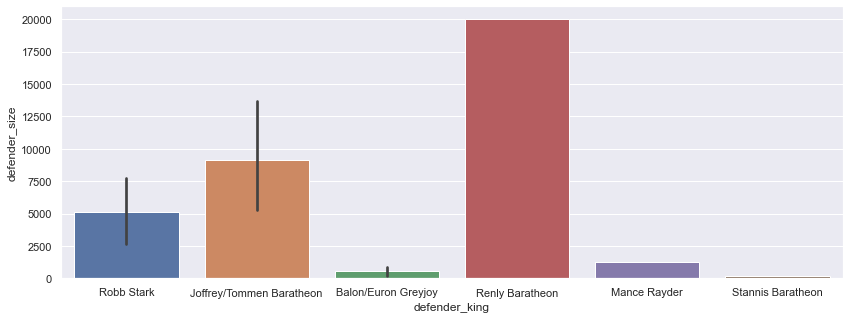

In [46]:
sns.set(rc={'figure.figsize':(14,5)})
sns.barplot(x='defender_king',y='defender_size',data=battle)
plt.show()

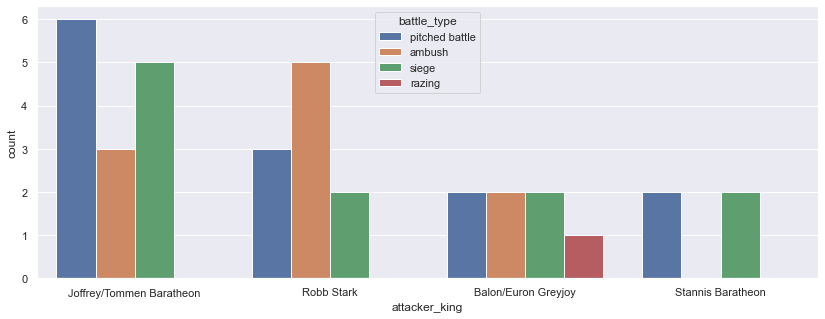

In [15]:
sns.countplot(x=battle['attacker_king'],hue=battle['battle_type'])
plt.show()

To identify at what region the most battles happened

<AxesSubplot:>

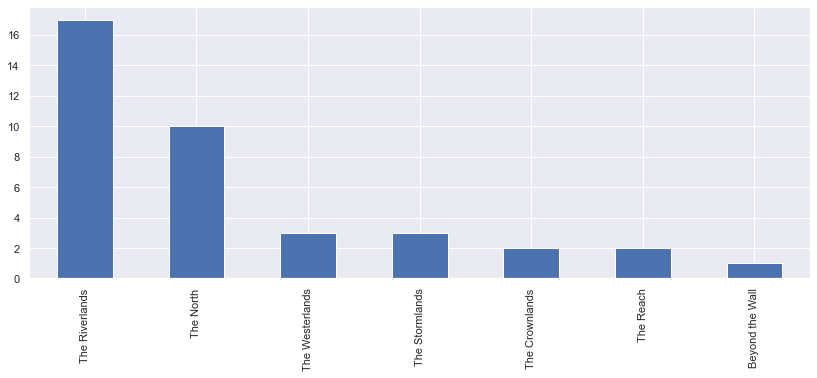

In [48]:
battle['region'].value_counts().plot(kind='bar')

Which Year Had Most Battles?

<AxesSubplot:title={'center':'Which Year Had Most Battles?'}, ylabel='year'>

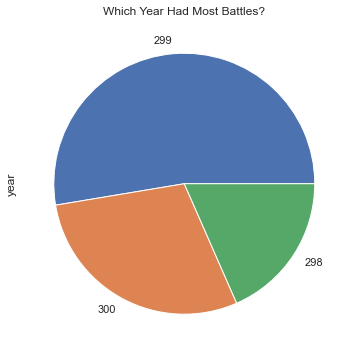

In [49]:
battle['year'].value_counts().plot(kind='pie', figsize=(6,6), title='Which Year Had Most Battles?')

Most battle fought in which region

<AxesSubplot:ylabel='region'>

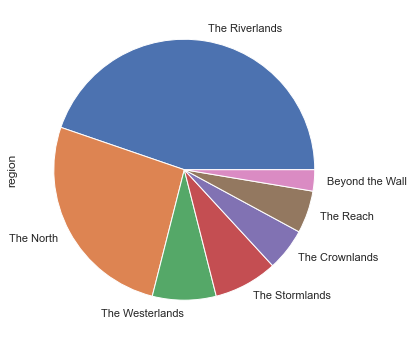

In [57]:
battle['region'].value_counts().plot(kind='pie', figsize=(6,6),title="most battle fought in which region")

Win - Lose distribution

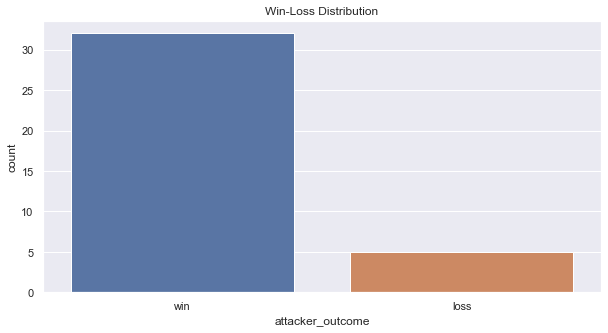

In [86]:
sns.countplot(x='attacker_outcome',data = battle)
plt.title('Win-Loss Distribution')
plt.show()

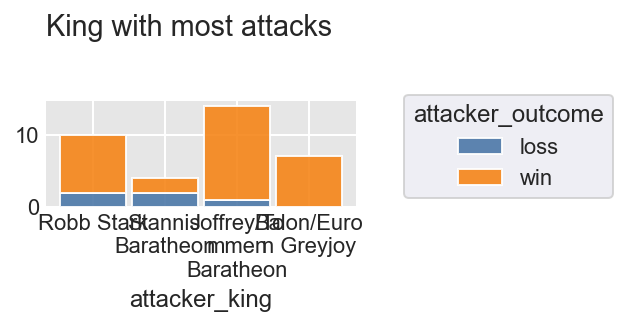

In [77]:
dxp.count(val='attacker_king', data=battle, split = 'attacker_outcome', stacked=True,title='King with most attacks')

In [81]:
# new column to count the alliance during an attack

battle['alliance_count'] = (4 - battle[["primary_attacker", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))

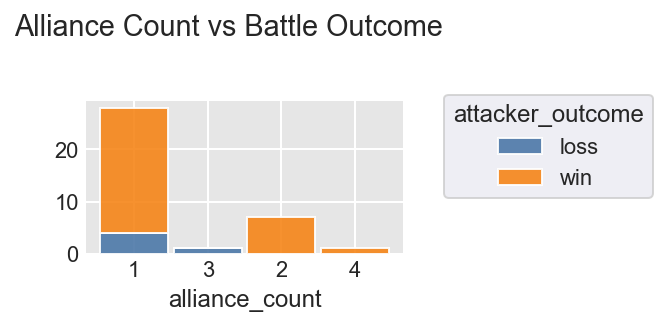

In [82]:
dxp.count(val='alliance_count', data=battle, split ='attacker_outcome', stacked=True,title='Alliance Count vs Battle Outcome')

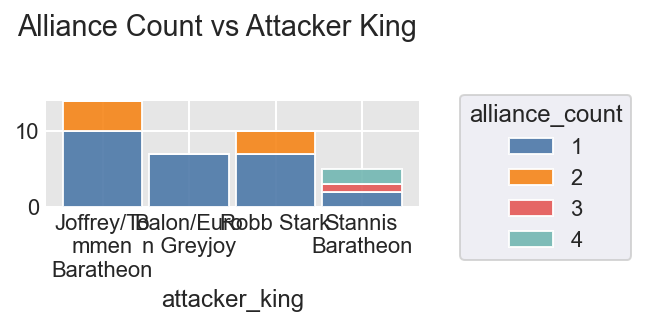

In [102]:

dxp.count(val='attacker_king', data=battle, split = 'alliance_count', stacked=True,title='Alliance Count vs Attacker King')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'Jaime Lannister'),
  Text(1, 0, 'Gregor Clegane'),
  Text(2, 0, 'Jaime Lannister, Andros Brax'),
  Text(3, 0, 'Roose Bolton, Wylis Manderly, Medger Cerwyn, Harrion Karstark, Halys Hornwood'),
  Text(4, 0, 'Robb Stark, Brynden Tully'),
  Text(5, 0, 'Robb Stark, Tytos Blackwood, Brynden Tully'),
  Text(6, 0, 'Victarion Greyjoy'),
  Text(7, 0, 'Asha Greyjoy'),
  Text(8, 0, 'Theon Greyjoy'),
  Text(9, 0, 'Rodrik Cassel, Cley Cerwyn'),
  Text(10, 0, 'Dagmer Cleftjaw'),
  Text(11, 0, 'Ramsay Snow, Theon Greyjoy '),
  Text(12, 0, 'Stannis Baratheon, Davos Seaworth'),
  Text(13, 0, 'Tywin Lannister, Flement Brax, Gregor Clegane, Addam Marbrand, Lyle Crakehall, Leo Lefford'),
  Text(14, 0, 'Roose Bolton, Vargo Hoat, Robett Glover'),
  Text(15, 0, 'Robb Stark, Smalljon Umber, Black Walder Frey'),
  Text(16, 0, 'Stannis Baratheon, Imry Florent

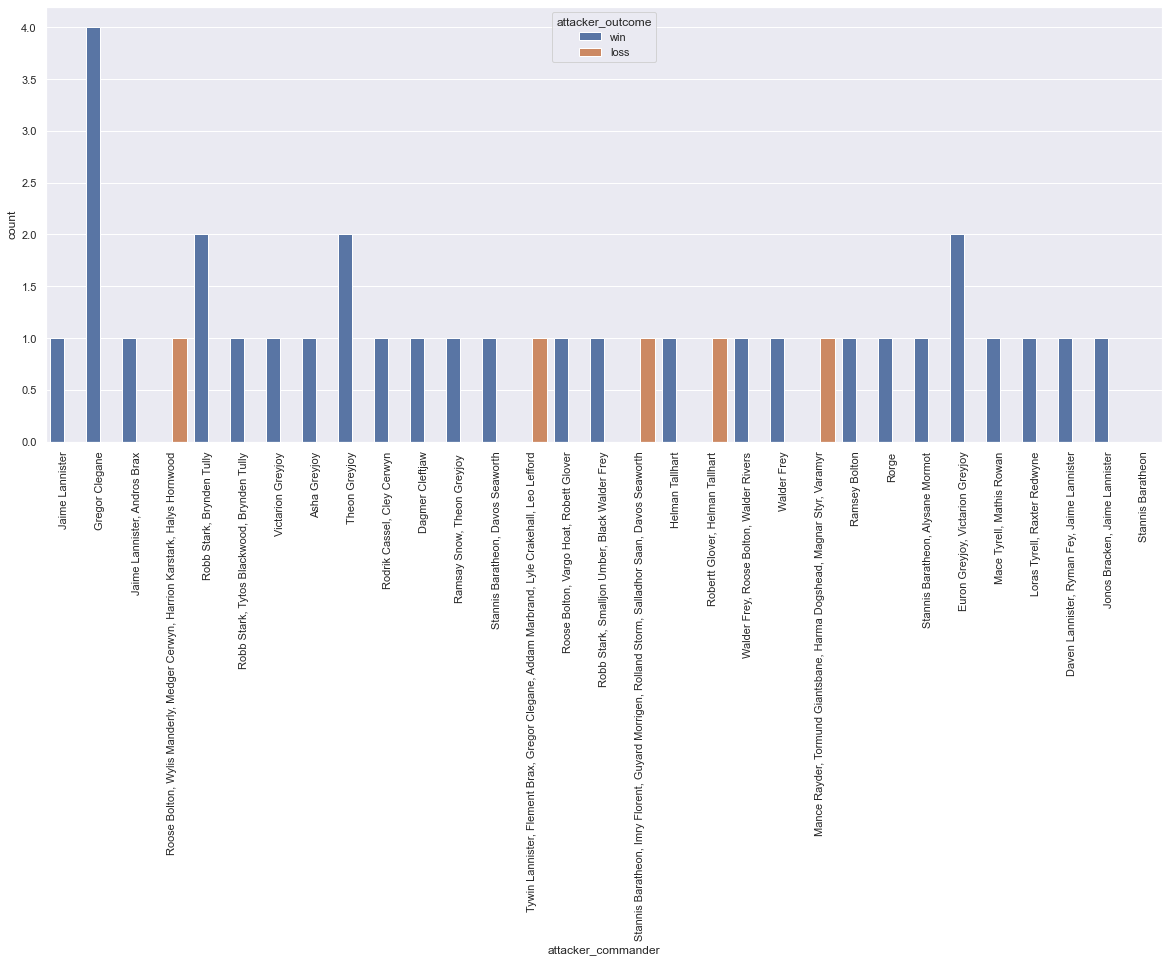

In [87]:
plt.figure(figsize=(20,8))
sns.countplot(battle['attacker_commander'],hue=battle['attacker_outcome']);
plt.xticks(rotation=90)

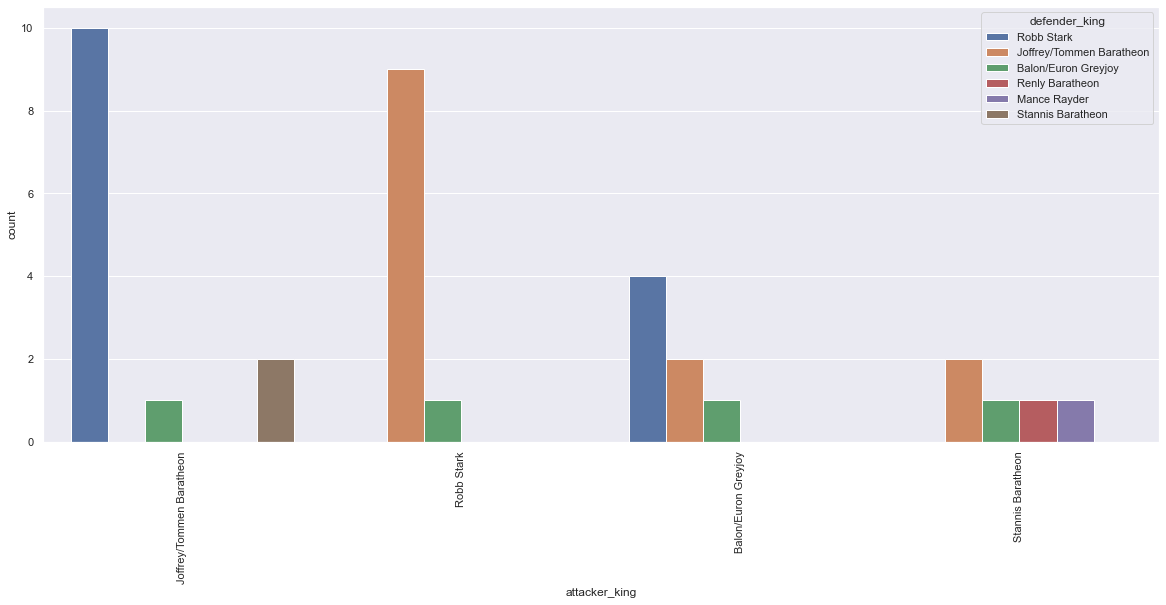

In [90]:
plt.figure(figsize=(20,8))
sns.countplot(battle['attacker_king'],hue=battle['defender_king']);
plt.xticks(rotation=90);

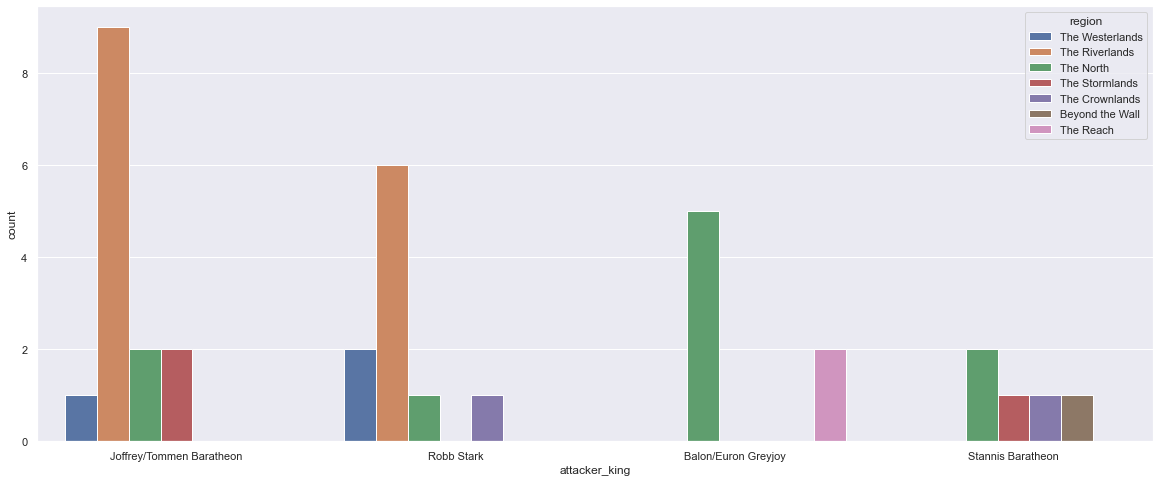

In [93]:
plt.figure(figsize=(20,8))
sns.countplot(battle['attacker_king'],hue=battle['region']);

In [114]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [16]:
death = pd.read_csv("character-deaths.csv")
death.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [17]:
death.shape

(917, 13)

In [18]:
death.size

11921

In [19]:
death['Allegiances'].value_counts()

None               253
Night's Watch      116
Lannister           81
Stark               73
Baratheon           56
Greyjoy             51
Wildling            40
House Stark         35
Martell             25
House Greyjoy       24
Arryn               23
Tully               22
House Lannister     21
House Targaryen     19
Targaryen           17
Tyrell              15
House Martell       12
House Tyrell        11
House Tully          8
House Baratheon      8
House Arryn          7
Name: Allegiances, dtype: int64

In [20]:
death['Gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
912    1
913    1
914    1
915    1
916    1
Name: Gender, Length: 917, dtype: int64>

In [21]:
death['Nobility'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
912    0
913    0
914    1
915    0
916    1
Name: Nobility, Length: 917, dtype: int64>

Number of deaths per year

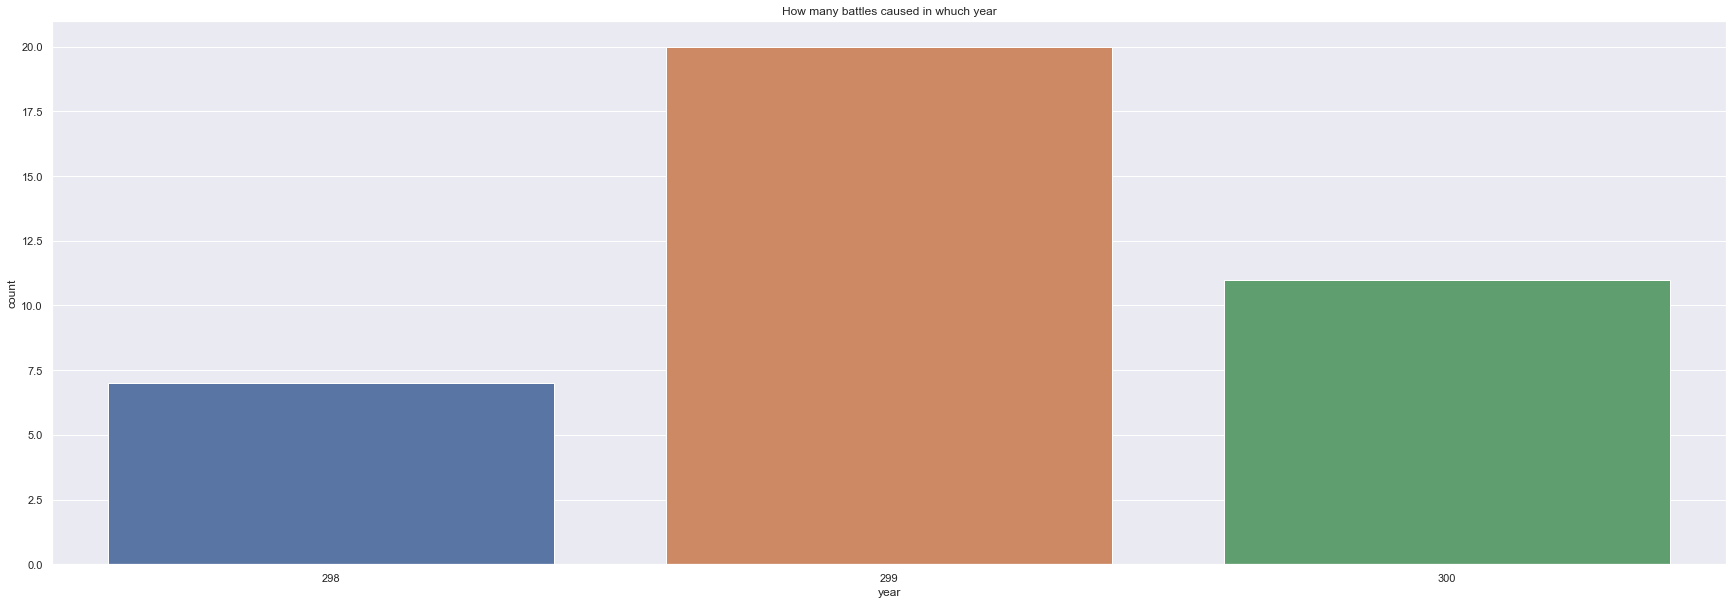

In [108]:

sns.countplot(battle['year'])
plt.title('How many battles caused in whuch year')
plt.show()

Checking the maximum death caused in whuch year

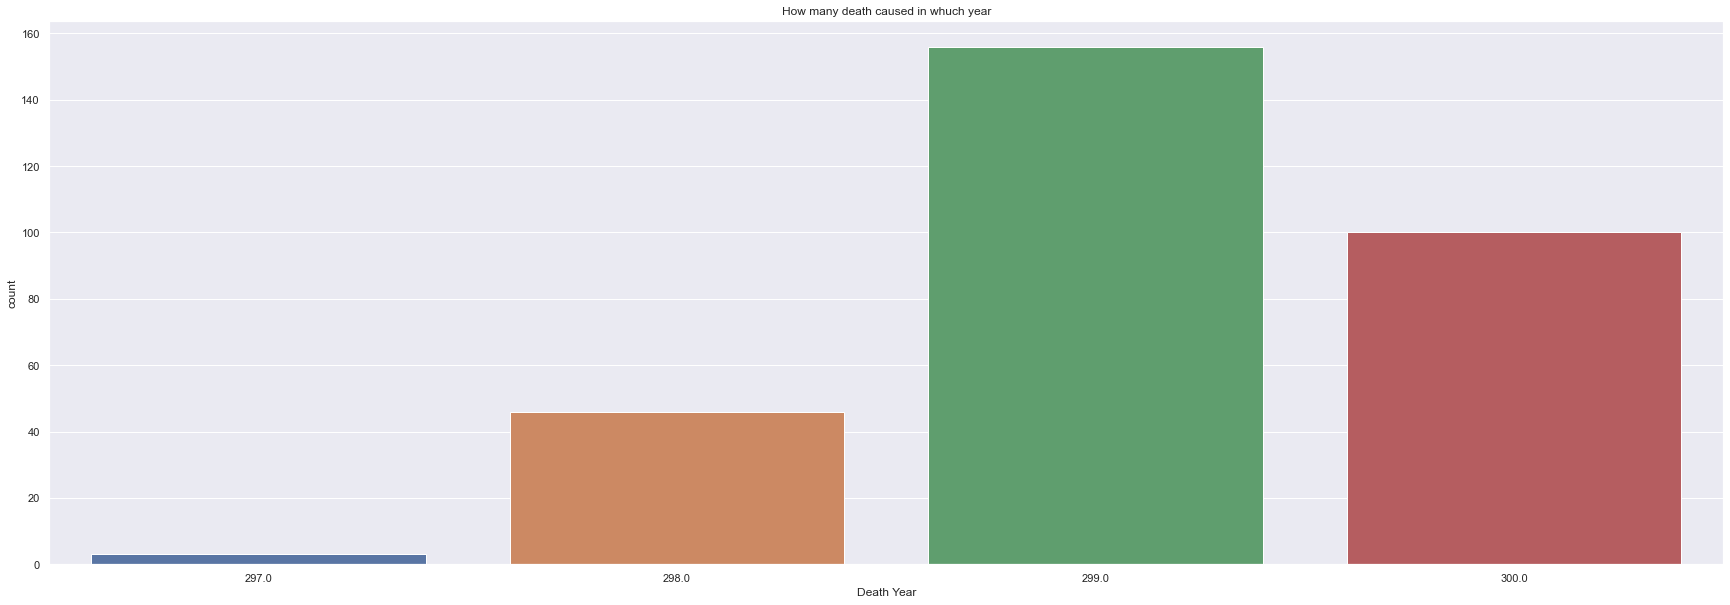

In [109]:

sns.countplot(death['Death Year'])
plt.title('How many death caused in whuch year')
plt.show()

Which Gender died more lets check?

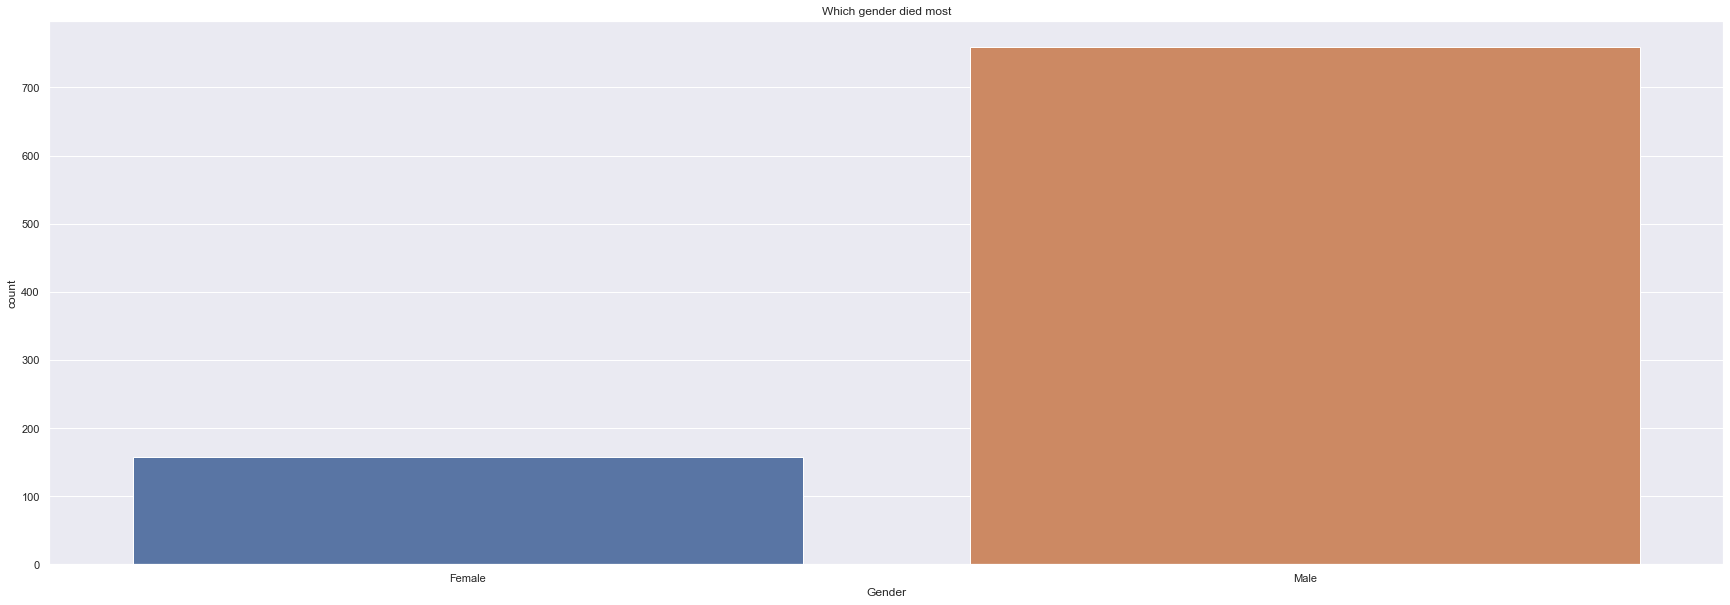

In [113]:
sns.countplot(death['Gender'])
plt.title('Which gender died most')
plt.xticks(np.arange(2),('Female','Male'))
plt.show()

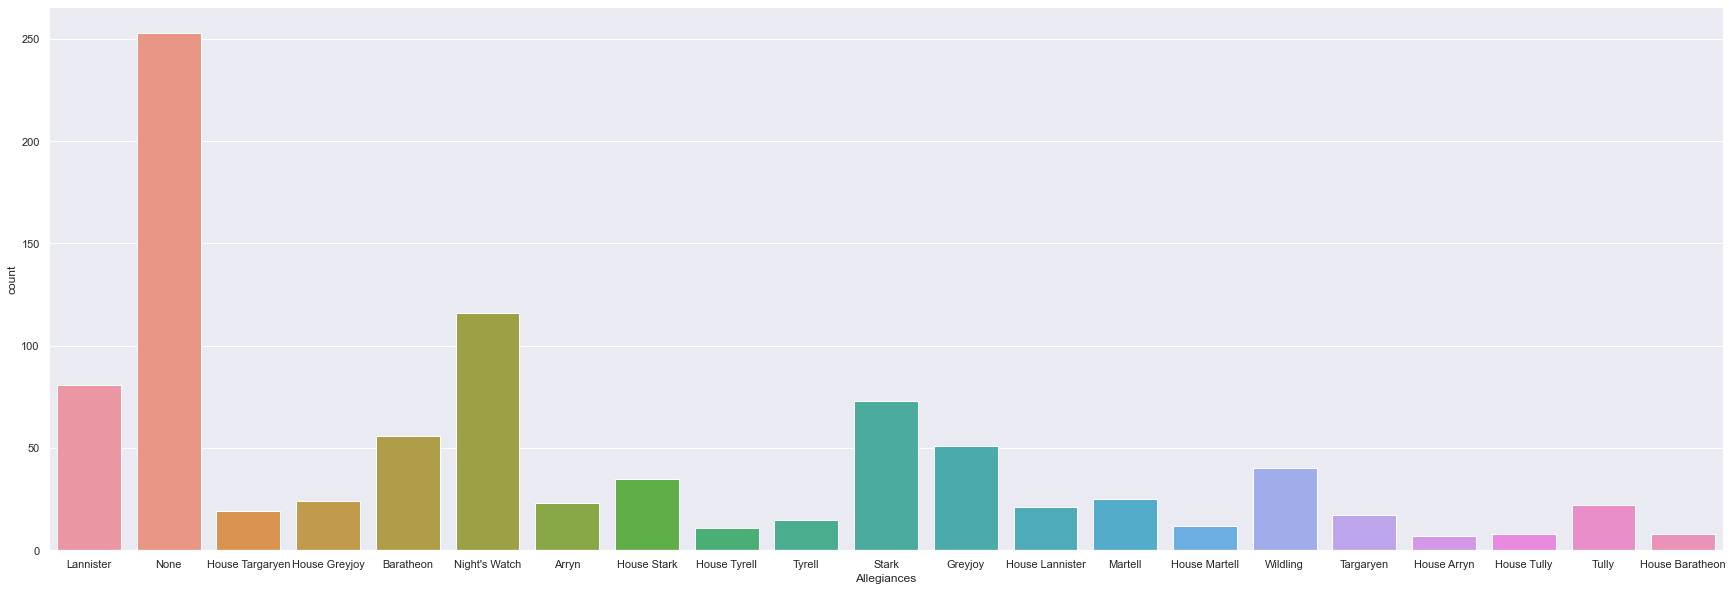

In [95]:
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(death['Allegiances'])
plt.show()

Major death/capture events by year

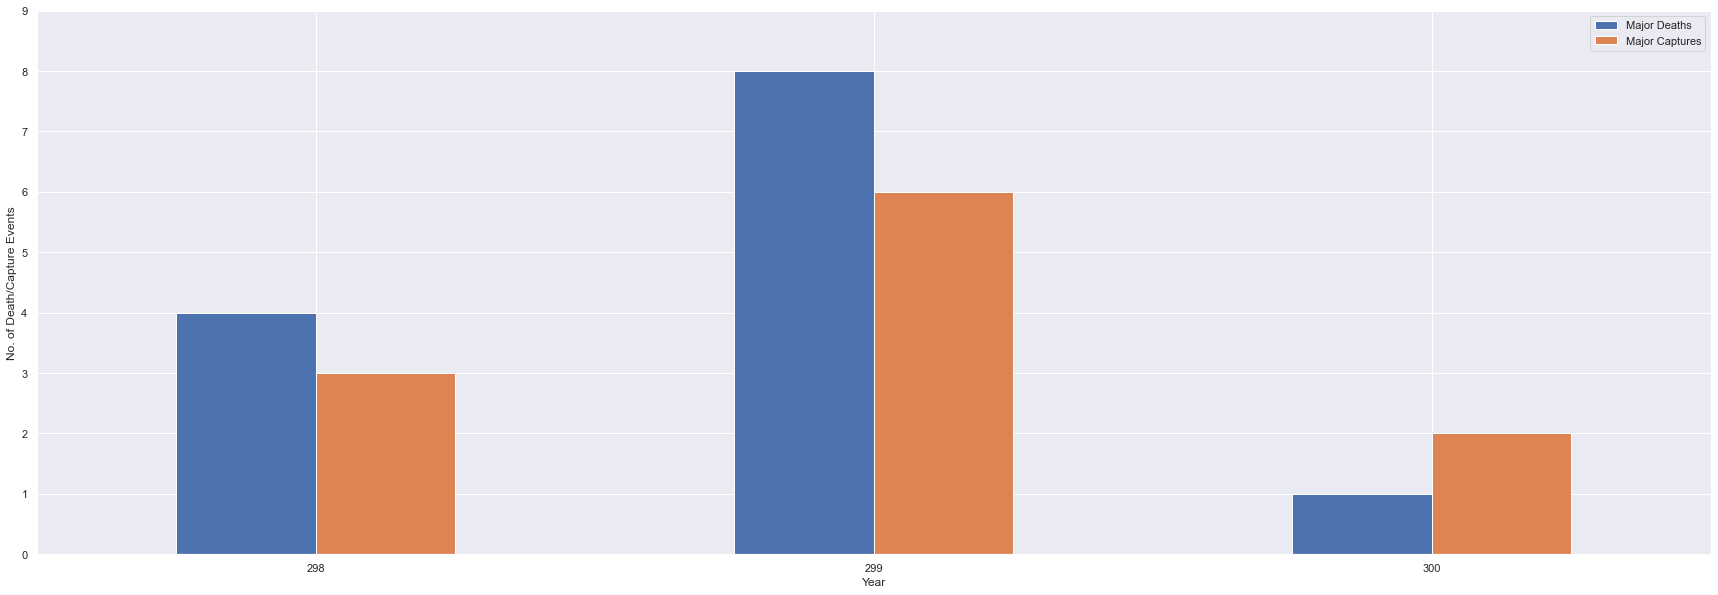

In [43]:
p = battle.groupby('year').sum()[["major_death", "major_capture"]].plot.bar(rot = 0)
_ = p.set(xlabel = "Year", ylabel = "No. of Death/Capture Events", ylim = (0, 9)), p.legend(["Major Deaths", "Major Captures"])

Which Year Had Most Deaths?

<AxesSubplot:title={'center':'Which Year Had Most Deaths?'}, ylabel='Death Year'>

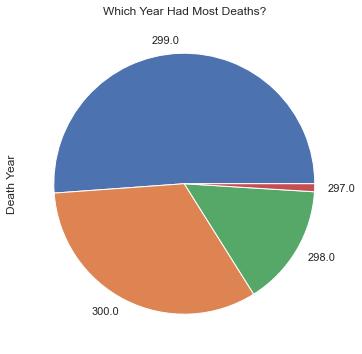

In [51]:
death['Death Year'].value_counts().plot(kind='pie', figsize=(6,6), title='Which Year Had Most Deaths?')

In [27]:
char = pd.read_csv('character-predictions.csv')
char.sample(5)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
764,765,1,1,0.767,0.233,Meha,NaN,0,Free Folk,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.006689,1
116,117,1,1,0.762,0.238,Rollam Westerling,NaN,1,NaN,290.0,...,NaN,NaN,0,0,15.0,0,0,0,0.043478,1
1644,1645,1,1,1.000,0.000,Bael the Bard,King-Beyond-the-Wall,1,Free folk,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.000000,1
912,913,1,1,0.813,0.187,Armond Caswell,Bitterbridge,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.006689,1
1274,1275,1,1,0.761,0.239,Osmund Frey,NaN,0,NaN,297.0,...,NaN,NaN,0,0,8.0,0,0,0,0.050167,1


In [28]:
char.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
char.size

64218

In [32]:
char.shape

(1946, 33)

In [37]:
char['isMarried'].value_counts()

0    1670
1     276
Name: isMarried, dtype: int64

In [38]:
char['culture'].value_counts()

Northmen     124
Ironborn     112
Free Folk     51
Valyrian      43
Braavosi      42
            ... 
Andal          1
Norvoshi       1
Qarth          1
Lhazarene      1
The Reach      1
Name: culture, Length: 64, dtype: int64

In [39]:
char.isnull().sum()

S.No                    0
actual                  0
pred                    0
alive                   0
plod                    0
name                    0
title                1008
male                    0
culture              1269
dateOfBirth          1513
DateoFdeath          1502
mother               1925
father               1920
heir                 1923
house                 427
spouse               1670
book1                   0
book2                   0
book3                   0
book4                   0
book5                   0
isAliveMother        1925
isAliveFather        1920
isAliveHeir          1923
isAliveSpouse        1670
isMarried               0
isNoble                 0
age                  1513
numDeadRelations        0
boolDeadRelations       0
isPopular               0
popularity              0
isAlive                 0
dtype: int64